In [5]:
from symbulate import *
%matplotlib inline
from matplotlib import pyplot as plt

## CLT demo

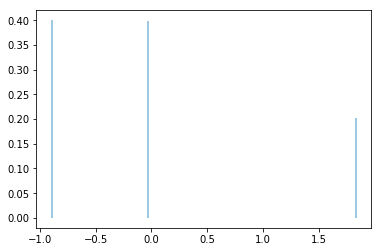

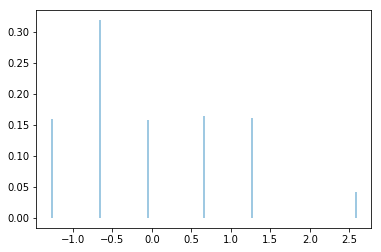

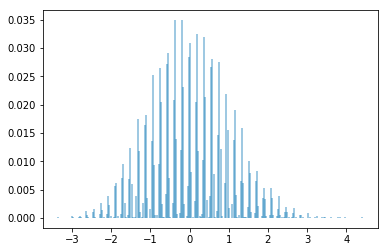

In [6]:
#population = Exponential(1/2)
# population = Normal(0, 1)
population = BoxModel([10, 70, 200], probs=[0.4, 0.4, 0.2])

def CLT(n):
    RV(population ** n, mean).sim(10000).standardize().plot()
    plt.xlim(-4, 4)
    plt.show()

from ipywidgets import interact
import ipywidgets
interact(CLT, n=ipywidgets.IntSlider(min=1, max=50, step=1, value=1));


0.1924

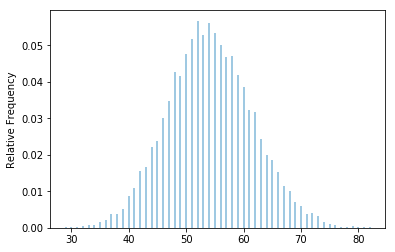

In [15]:
P = Poisson(2.7) ** 20
X = RV(P, sum)
x = X.sim(10000)
x.plot()
x.count_gt(60) / 10000

0.138

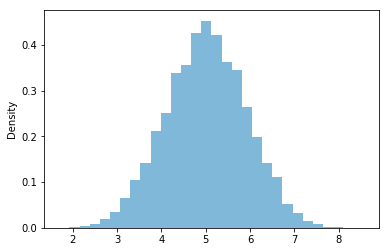

In [16]:
P = Uniform(0, 1) ** 10
S = RV(P, sum)
s = S.sim(10000)
s.plot()
s.count_lt(4) / 10000

0.9418

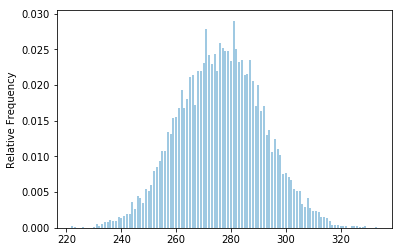

In [19]:
P = BoxModel([1,2,3,4,5,6], size=79)
X = RV(P, sum)
x = X.sim(10000)
x.plot()
x.count_leq(300) / 10000

(86.4853, 4.5985849899724585, 0.9404)

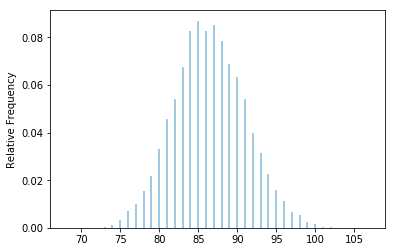

In [22]:
t = 300
def sum_until_t(omega):
    trials_so_far = []
    for i, w in enumerate(omega):
        trials_so_far.append(w)
        if sum(trials_so_far) > t:
            return i + 1 
        
P = BoxModel([1,2,3,4,5,6], size=inf)
X = RV(P, sum_until_t)
x = X.sim(10000)
x.plot()
x.mean(), x.sd(), x.count_geq(80) / 10000